<a href="https://colab.research.google.com/github/DomeSirawit/imdb_web_scraping/blob/main/web_scraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

web_scraping

In [ ]:
!pip install gazpacho

Import library

In [ ]:
from gazpacho import Soup
from requests import get

In [ ]:
url = "https://www.imdb.com/search/title/?groups=top_100&sort=user_rating,desc"

In [ ]:
resp = get(url)
resp.status_code ## if return code 200 means o, runfine and website can be access

200

Change url to soup object

In [ ]:
imdb = Soup(resp.text)

In [ ]:
imdb

In [ ]:
#convert result which return from server to soup object then using with .find to scape the infomation form website

In [ ]:
imdb.find('h1') ## now find h1 in imdb html code this will return the heading of the web site

<h1 class="header">IMDb &quot;Top 100&quot;
(Sorted by IMDb Rating Descending) </h1>

now find the movie name 

( using inspect while right click from website then observe that the movie name contain in h3)

In [ ]:
imdb.find('h3')

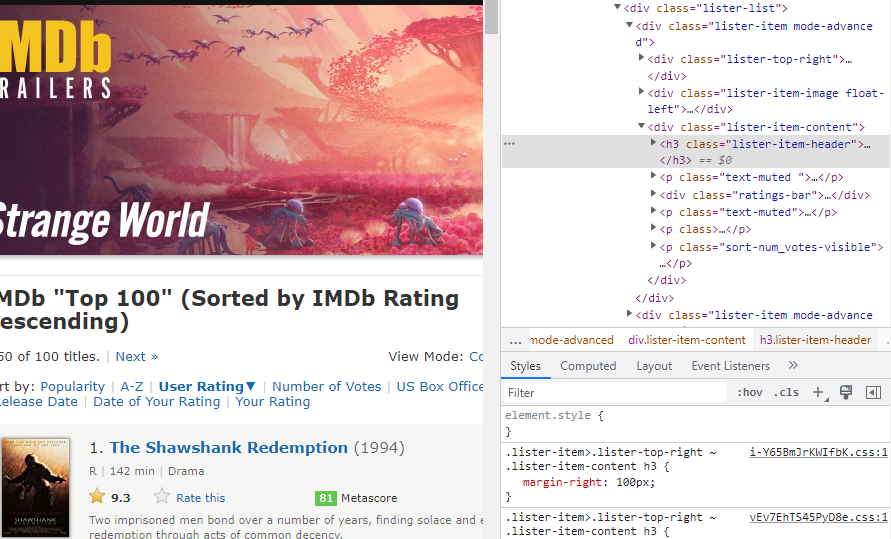

In [ ]:
imdb.find('h3', {'class' : 'lister-item-header'})

In [ ]:
## the previous code return thounsand of rows 
## using strip to get rid of thehtml code and using mode to get the firt value from h3
imdb.find('h3', {'class' : 'lister-item-header'},mode = 'first').strip() 

'1. The Shawshank Redemption (1994)'

### write loop to extract data and store data in table

In [ ]:
titles = imdb.find('h3', {'class': 'lister-item-header'})

clean_title = []

#write loop
for title in titles:
  print(title.strip()) ## write loop to extract h3 by each row and using strip to get rid of the html code
  clean_title.append(title.strip()) ## store the tilte in list using append to add data in to the new list

1. The Shawshank Redemption (1994)
2. The Godfather (1972)
3. The Dark Knight (2008)
4. The Lord of the Rings: The Return of the King (2003)
5. Schindler's List (1993)
6. The Godfather Part II (1974)
7. 12 Angry Men (1957)
8. Pulp Fiction (1994)
9. Inception (2010)
10. The Lord of the Rings: The Two Towers (2002)
11. Fight Club (1999)
12. The Lord of the Rings: The Fellowship of the Ring (2001)
13. Forrest Gump (1994)
14. The Good, the Bad and the Ugly (1966)
15. The Matrix (1999)
16. Goodfellas (1990)
17. Star Wars: Episode V - The Empire Strikes Back (1980)
18. One Flew Over the Cuckoo's Nest (1975)
19. Interstellar (2014)
20. City of God (2002)
21. Spirited Away (2001)
22. Saving Private Ryan (1998)
23. The Green Mile (1999)
24. Life Is Beautiful (1997)
25. Se7en (1995)
26. Terminator 2: Judgment Day (1991)
27. The Silence of the Lambs (1991)
28. Star Wars (1977)
29. Harakiri (1962)
30. Seven Samurai (1954)
31. It's a Wonderful Life (1946)
32. Parasite (2019)
33. Whiplash (2014)
34.

In [ ]:
clean_title

['1. The Shawshank Redemption (1994)',
 '2. The Godfather (1972)',
 '3. The Dark Knight (2008)',
 '4. The Lord of the Rings: The Return of the King (2003)',
 "5. Schindler's List (1993)",
 '6. The Godfather Part II (1974)',
 '7. 12 Angry Men (1957)',
 '8. Pulp Fiction (1994)',
 '9. Inception (2010)',
 '10. The Lord of the Rings: The Two Towers (2002)',
 '11. Fight Club (1999)',
 '12. The Lord of the Rings: The Fellowship of the Ring (2001)',
 '13. Forrest Gump (1994)',
 '14. The Good, the Bad and the Ugly (1966)',
 '15. The Matrix (1999)',
 '16. Goodfellas (1990)',
 '17. Star Wars: Episode V - The Empire Strikes Back (1980)',
 "18. One Flew Over the Cuckoo's Nest (1975)",
 '19. Interstellar (2014)',
 '20. City of God (2002)',
 '21. Spirited Away (2001)',
 '22. Saving Private Ryan (1998)',
 '23. The Green Mile (1999)',
 '24. Life Is Beautiful (1997)',
 '25. Se7en (1995)',
 '26. Terminator 2: Judgment Day (1991)',
 '27. The Silence of the Lambs (1991)',
 '28. Star Wars (1977)',
 '29. Har

In [ ]:
#extract the rating value
ratings = imdb.find('div',{'class': 'ratings-imdb-rating'})
# store rating value
ratings = [float(x.strip()) for x in ratings]
ratings

[9.3,
 9.2,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 8.9,
 8.8,
 8.8,
 8.8,
 8.8,
 8.8,
 8.8,
 8.7,
 8.7,
 8.7,
 8.7,
 8.6,
 8.6,
 8.6,
 8.6,
 8.6,
 8.6,
 8.6,
 8.6,
 8.6,
 8.6,
 8.6,
 8.6,
 8.6,
 8.5,
 8.5,
 8.5,
 8.5,
 8.5,
 8.5,
 8.5,
 8.5,
 8.5,
 8.5,
 8.5,
 8.5,
 8.5,
 8.5,
 8.5,
 8.5,
 8.5,
 8.5,
 8.5]

In [ ]:
import pandas as pd

In [ ]:
#create pandas data frame
# assign the table name and value to the pandas data frame
imdb_movies = pd.DataFrame({"title" : clean_title,
                            "rating": ratings})
imdb_movies

,title,rating
0,1. The Shawshank Redemption (1994),9.3
1,2. The Godfather (1972),9.2
2,3. The Dark Knight (2008),9.0
3,4. The Lord of the Rings: The Return of the Ki...,9.0
4,5. Schindler's List (1993),9.0
5,6. The Godfather Part II (1974),9.0
6,7. 12 Angry Men (1957),9.0
7,8. Pulp Fiction (1994),8.9
8,9. Inception (2010),8.8
9,10. The Lord of the Rings: The Two Towers (2002),8.8
